In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold

In [2]:
import tensorflow as tf

In [3]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.wrappers.scikit_learn import KerasClassifier  
from keras.utils import np_utils
from keras.optimizers import Adam

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
dataset = pd.read_csv('cleaned_data.dat',sep=' ', header=None)
dataset.columns =["COMPACTNESS","CIRCULARITY","DISTANCE CIRCULARITY","RADIUS RATIO","PR.AXIS ASPECT RATIO",
                      "MAX.LENGTH ASPECT RATIO","SCATTER RATIO","ELONGATEDNESS","PR.AXIS RECTANGULARITY",
                       "MAX.LENGTH RECTANGULARITY","SCALED VARIANCE ALONG MAJOR AXIS","SCALED VARIANCE ALONG MINOR AXIS",
                      "SCALED RADIUS OF GYRATION","SKEWNESS ABOUT MAJOR AXIS","SKEWNESS ABOUT MINOR AXIS",
                      "KURTOSIS ABOUT MINOR AXIS","KURTOSIS ABOUT MAJOR AXIS","HOLLOWS RATIO","vehicle_type"]
dataset

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,vehicle_type
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
810,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
811,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
812,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [6]:
# Get all the attributes
X = dataset.iloc[:, 0:18].values
y = dataset.iloc[:,18].values

In [7]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y) # Convert an array of y strings to an array of integers
y1

array([3, 3, 2, 3, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3, 0,
       0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 2, 0, 1, 3, 3, 2, 3, 3,
       3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1, 0, 1, 3, 0,
       1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, 1, 2, 1, 2,
       3, 0, 1, 2, 0, 1, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0, 3, 3, 1, 3, 3, 1,
       2, 0, 0, 2, 3, 3, 3, 3, 0, 3, 0, 2, 2, 3, 1, 3, 3, 2, 3, 2, 0, 1,
       0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2, 3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0, 1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0,
       1, 1, 1, 3, 2, 0, 2, 0, 2, 0, 0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1,
       1, 3, 0, 0, 1, 1, 2, 1, 0, 3, 1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 2, 0,
       2, 3, 3, 0, 0, 1, 0, 1, 1, 0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0,
       1, 2, 0, 1, 0, 0, 2, 3, 2, 0, 3, 1, 2, 3, 0, 3, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 3, 0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 0,

In [8]:
Y = pd.get_dummies(y1).values # Finally, y1 is transformed into the array structure needed for the neural network
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [9]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
# Reserve 20% samples for validation
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [15]:
model = Sequential([
        Dense(64, activation='relu', input_shape=(18,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])

In [16]:
model.compile(Adam(learning_rate=0.001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1216      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)               

In [17]:
# Early stopping can be used to prevent overfitting by intercepting the model throughout the training process 
# to save the parameter model with the best results.
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=50, 
    min_delta=0.001, 
    mode='max'
)

In [18]:
# Fit the training data into the model
history = model.fit(X_train, y_train, validation_data=(x_val,y_val), epochs=500, batch_size=8,
    callbacks=[early_stopping])

Epoch 1/500
65/65 [==============================] - 1s 6ms/step - loss: 1.7821 - accuracy: 0.3692 - val_loss: 1.2197 - val_accuracy: 0.3588
Epoch 2/500
65/65 [==============================] - 0s 2ms/step - loss: 1.4579 - accuracy: 0.3577 - val_loss: 1.1767 - val_accuracy: 0.4275
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 1.3275 - accuracy: 0.3712 - val_loss: 1.2919 - val_accuracy: 0.4122
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 1.2050 - accuracy: 0.4038 - val_loss: 1.1555 - val_accuracy: 0.5115
Epoch 5/500
65/65 [==============================] - 0s 2ms/step - loss: 1.2224 - accuracy: 0.4173 - val_loss: 1.1154 - val_accuracy: 0.5115
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 1.2013 - accuracy: 0.4500 - val_loss: 1.2899 - val_accuracy: 0.4504
Epoch 7/500
65/65 [==============================] - 0s 3ms/step - loss: 1.1888 - accuracy: 0.4212 - val_loss: 1.0825 - val_accuracy: 0.4580
Epoch 8/500
6

Epoch 59/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.7115 - val_loss: 0.7764 - val_accuracy: 0.6489
Epoch 60/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7327 - val_loss: 0.5774 - val_accuracy: 0.7023
Epoch 61/500
65/65 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7135 - val_loss: 0.6185 - val_accuracy: 0.6565
Epoch 62/500
65/65 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6750 - val_loss: 0.7576 - val_accuracy: 0.5802
Epoch 63/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7135 - val_loss: 0.6347 - val_accuracy: 0.7252
Epoch 64/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7308 - val_loss: 0.6025 - val_accuracy: 0.6260
Epoch 65/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6865 - val_loss: 0.5389 - val_accuracy: 0.7634
Epoch 

65/65 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7750 - val_loss: 0.5388 - val_accuracy: 0.7252
Epoch 117/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7462 - val_loss: 0.6773 - val_accuracy: 0.6870
Epoch 118/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7462 - val_loss: 0.4532 - val_accuracy: 0.7252
Epoch 119/500
65/65 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7769 - val_loss: 0.5791 - val_accuracy: 0.6565
Epoch 120/500
65/65 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7308 - val_loss: 0.7332 - val_accuracy: 0.6412
Epoch 121/500
65/65 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7212 - val_loss: 0.4820 - val_accuracy: 0.7023
Epoch 122/500
65/65 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.7769 - val_loss: 0.5174 - val_accuracy: 0.7328
Epoch 123/500

In [19]:
# Evaluate the model on the training data
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.7596
accuracy: 75.96%


In [20]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7178
test loss, test acc: [0.5611980557441711, 0.7177914381027222]


In [21]:
# Generate predictions (probabilities -- the output of the last layer) on the test data
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 0s 1ms/step


array([[2.94958102e-03, 5.29597640e-01, 4.66626078e-01, 8.26751697e-04],
       [2.13667601e-02, 5.12849808e-01, 3.84240121e-01, 8.15433636e-02],
       [9.40162106e-04, 4.21473622e-01, 2.80707687e-01, 2.96878546e-01],
       [3.07775736e-02, 8.32407951e-01, 1.35173082e-01, 1.64129212e-03],
       [9.97011185e-01, 2.55045644e-03, 1.93902059e-04, 2.44436553e-04],
       [4.98350104e-03, 5.79035401e-01, 4.15008932e-01, 9.72090638e-04],
       [2.90800212e-03, 4.32084084e-01, 3.59467924e-01, 2.05539957e-01],
       [3.69217759e-03, 5.92150927e-01, 4.03789490e-01, 3.67350644e-04],
       [7.52851265e-05, 9.76000071e-01, 2.39063874e-02, 1.83110951e-05],
       [9.99944627e-01, 1.14226168e-05, 5.29837007e-06, 3.86532702e-05],
       [2.14350550e-03, 7.41284549e-01, 2.56220430e-01, 3.51423572e-04],
       [2.87184422e-03, 5.30597806e-01, 4.65899020e-01, 6.31241070e-04],
       [1.93857343e-03, 4.97186810e-01, 5.00446260e-01, 4.28290979e-04],
       [1.92099933e-10, 4.65063749e-05, 1.63768651e

In [22]:
# save the model
model.save('model.h5')

In [23]:
# draw the image for training and validation loss
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

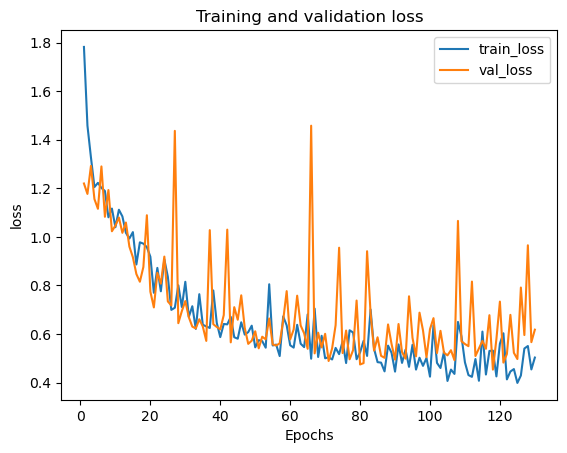

In [24]:
plot_metric(history, 'loss')